In [ ]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import pickle
from sklearn.metrics import roc_curve, auc 

In [2]:
df = pd.read_csv("../data/processed/gladiador_data_procesado.csv")
df.head()

,Wins,Public Favor,Survived,Allegiance Network_Strong
0,11,0.841842,False,1
1,7,0.651044,True,0
2,6,0.593816,True,1
3,6,0.540815,False,1
4,12,0.761651,False,1


In [3]:
df['Survived'] = df['Survived'].astype(int)
df.head()

,Wins,Public Favor,Survived,Allegiance Network_Strong
0,11,0.841842,0,1
1,7,0.651044,1,0
2,6,0.593816,1,1
3,6,0.540815,0,1
4,12,0.761651,0,1


## MODELO RANDOM FOREST CLASSIFIER

In [4]:
X = df[["Wins", "Public Favor", "Allegiance Network_Strong"]]
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7980, 3)
(7980,)
(1996, 3)
(1996,)


In [5]:
cv= KFold(10)
rfc = RandomForestClassifier(n_estimators=50, max_depth=5, max_features=3, random_state=42)
rfc.fit(X_train, y_train)
cv_rfc = cross_val_score(estimator=rfc, cv=cv, X= X, y= y, scoring="accuracy")

In [6]:
print(cv_rfc)

[0.71743487 0.73847695 0.71843687 0.74448898 0.73547094 0.71943888
 0.71915747 0.7221665  0.72116349 0.72417252]


In [7]:
print(cv_rfc.max())

0.7444889779559118


In [8]:
print(cv_rfc.mean())

0.72604074749298


In [9]:
#Realizo Predicciones

# Predicciones sobre el mismo conjunto de datos de entrenamiento
pred_rfc = rfc.predict(X_test)

In [10]:
#Obtengo las PROBABILIDADES de predicción
pred_proba = rfc.predict_proba(X_test)[:, 1]

In [11]:
print("--- Métricas de Clasificación ---")
print("Precisión (Accuracy): ", accuracy_score(y_test, pred_rfc))
print("Precisión (Clase 1): ", precision_score(y_test, pred_rfc))
print("Sensibilidad (Recall - Clase 1): ", recall_score(y_test, pred_rfc))
print("Puntuación F1 (Clase 1): ", f1_score(y_test, pred_rfc))
# Si pred_dtc son probabilidades, podrías calcular el ROC AUC:
print("ROC AUC: ", roc_auc_score(y_test, pred_proba))

--- Métricas de Clasificación ---
Precisión (Accuracy):  0.7279559118236473
Precisión (Clase 1):  0.6893874029335634
Sensibilidad (Recall - Clase 1):  0.8136456211812627
Puntuación F1 (Clase 1):  0.746380196170014
ROC AUC:  0.7983666550171328


In [12]:
# También puedes predecir para un nuevo dato, por ejemplo:
# Un personaje con 8 victorias, 0.7 de favor público y una red de lealtad fuerte (1)
new_data = pd.DataFrame([[8, 0.7, 1]], columns=["Wins", "Public Favor", "Allegiance Network_Strong"])
new_prediction = rfc.predict(new_data)

print(f"\nPredicción para un nuevo personaje (Wins: 8, Public Favor: 0.7, Allegiance Network_Strong: 1): {new_prediction[0]}")

if new_prediction[0] == 1:
    print("El modelo predice que este personaje Sobreviviría.")
else:
    print("El modelo predice que este personaje No Sobreviviría.")


Predicción para un nuevo personaje (Wins: 8, Public Favor: 0.7, Allegiance Network_Strong: 1): 1
El modelo predice que este personaje Sobreviviría.


In [13]:
#Creo un DataFrame completo de entrenamiento combinando X_train y y_train
train_df = pd.concat([X_train, y_train], axis=1)

#Creo un DataFrame completo de prueba combinando X_test y y_test
test_df = pd.concat([X_test, y_test], axis=1)

# Guardar los DataFrames en archivos CSV
train_df.to_csv("../data/train/train_data.csv", index=False)
test_df.to_csv("../data/test/test_data.csv", index=False)

In [14]:
with open("../models/rfc_model_final.pkl", "wb") as f:
    pickle.dump(rfc, f)

## VISUALIZACIONES

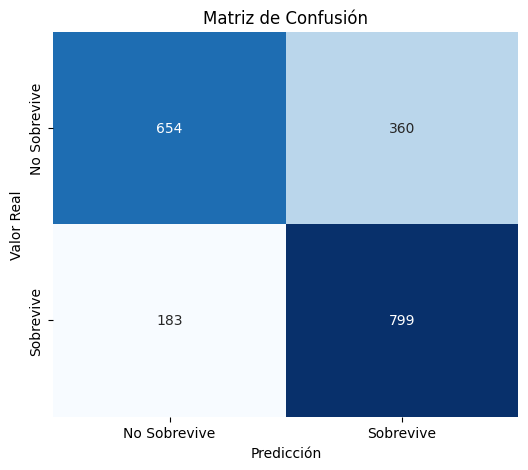

In [ ]:
#MATRIZ DE CONFUSIÓN
cm = confusion_matrix(y_test, pred_rfc)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Sobrevive', 'Sobrevive'],
            yticklabels=['No Sobrevive', 'Sobrevive'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

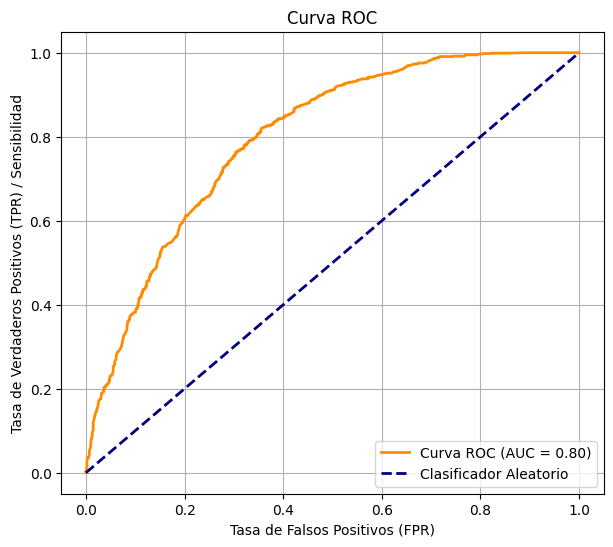

In [17]:
#CURVA ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
roc_auc = auc(fpr, tpr) # O puedes usar tu roc_auc_score previamente calculado

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Clasificador Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR) / Sensibilidad')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

C:\Users\yoai\AppData\Local\Temp\ipykernel_23580\3140841951.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


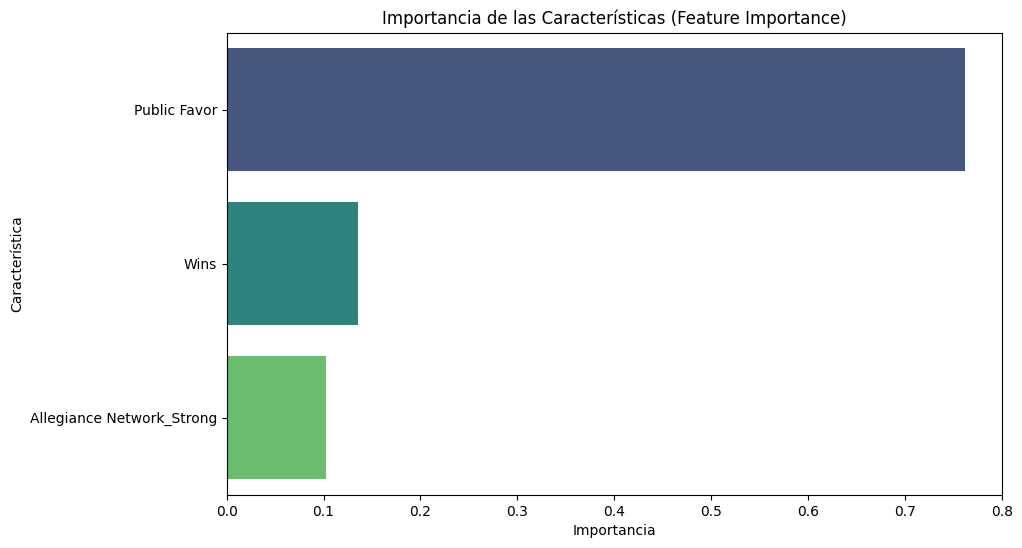

In [18]:
#FEATURE IMPORTANCE
feature_importances = rfc.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Importancia de las Características (Feature Importance)')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

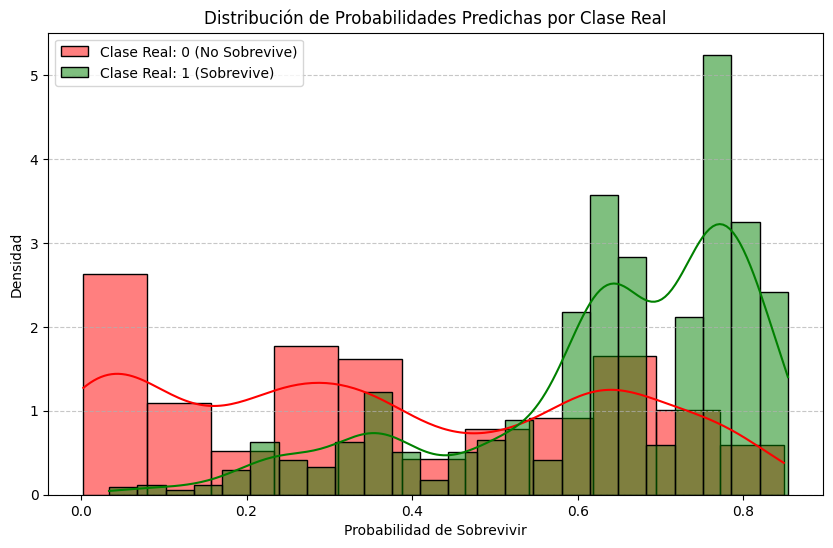

In [ ]:
#DISTRIBUCION DE PROBABILIDADES PREDICHAS
probabilities_class_0 = pred_proba[y_test == 0]
probabilities_class_1 = pred_proba[y_test == 1]

plt.figure(figsize=(10, 6))
sns.histplot(probabilities_class_0, color='red', kde=True, label='Clase Real: 0 (No Sobrevive)', stat='density', alpha=0.5)
sns.histplot(probabilities_class_1, color='green', kde=True, label='Clase Real: 1 (Sobrevive)', stat='density', alpha=0.5)
plt.title('Distribución de Probabilidades Predichas por Clase Real')
plt.xlabel('Probabilidad de Sobrevivir')
plt.ylabel('Densidad')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()